In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
# from sklearn.model_selection import LearningCurveDisplay
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

pd.set_option('display.max_columns', None)

In [2]:
import sklearn
sklearn. __version__

'1.0.2'

### Leitura dos dados
- Dados provenientes do site Kaggle
- https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
- Dataset previamente dividido em treino e teste

Carregamento dos dados

In [3]:
celltrain = pd.read_csv('cellphone-data-train.csv')
celltest = pd.read_csv('cellphone-data-test.csv')

Dicionário de dados

<div>
    <table>
  <tr>
    <th><span style='background-color:lightgrey'>battery_power:</span></th>
    <th><span style='background-color:lightgrey'>blue:</span></th>
    <th><span style='background-color:lightgrey'>clock_speed:</span></th>
    <th><span style='background-color:lightgrey'>dual_sim:</span></th>
    <th><span style='background-color:lightgrey'>fc:</span></th>
    <th><span style='background-color:lightgrey'>four_g:</span></th>
    <th><span style='background-color:lightgrey'>int_memory:</span></th>
  </tr>
  <tr>
    <td>Total energy a battery can store in one time measured in mAh</td>
    <td>Has bluetooth or not</td>
    <td>speed at which microprocessor executes instructions</td>
    <td>Has dual sim support or not</td>
    <td>Front Camera mega pixels</td>
    <td>Has 4G or not</td>
    <td>Internal Memory in Gigabytes</td>
  </tr>
  <tr>
    <th><span style='background-color:lightgrey'>m_dep:</span></th>
    <th><span style='background-color:lightgrey'>mobile_wt:</span></th>
    <th><span style='background-color:lightgrey'>n_cores:</span></th>
    <th><span style='background-color:lightgrey'>pc:</span></th>
    <th><span style='background-color:lightgrey'>px_height:</span></th>
    <th><span style='background-color:lightgrey'>px_width:</span></th>
    <th><span style='background-color:lightgrey'>ram:</span></th>
  </tr>
  <tr>
    <td>Mobile Depth in cm</td>
    <td>Weight of mobile phone</td>
    <td>Number of cores of processor</td>
    <td>Primary Camera mega pixels</td>
    <td>Pixel Resolution Height</td>
    <td>Pixel Resolution Width</td>
    <td>Random Access Memory in Mega Bytes</td>
  </tr>
  <tr>
    <th><span style='background-color:lightgrey'>sc_h:</span></th>
    <th><span style='background-color:lightgrey'>sc_w:</span></th>
    <th><span style='background-color:lightgrey'>talk_time:</span></th>
    <th><span style='background-color:lightgrey'>three_g:</span></th>
    <th><span style='background-color:lightgrey'>touch_screen:</span></th>
    <th><span style='background-color:lightgrey'>wifi:</span></th>
    <th><span style='background-color:lightgrey'>price_range:</span></th>
  </tr>
  <tr>
    <td>Screen Height of mobile in cm</td>
    <td>Screen Width of mobile in cm</td>
    <td>longest time that a single battery charge will last when you are</td>
    <td>Has 3G or not</td>
    <td>Has touch screen or not</td>
    <td>Has wifi or not</td>
    <td>This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).</td>
  </tr>
</table>
</div>

### Análise Exploratória dos Dados (EDA)

Primeiros registros

In [4]:
celltrain.head(3)
print(f'celltrain shape:{celltrain.shape}')

celltrain shape:(2000, 21)


Resumo sobre os dados
    
OBS:
battery_power, fc, int_memory, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time são passíveis de normalização, pois destoam das demais ordens de grandeza de outras features.


In [5]:
celltrain.info()
celltrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Histogramas de cada atributo
    
Há um percentual de 50% de telefones com baixo clock (<1.5Ghz), câmera frontal de baixa resolução (<3MP), baixa memória interna (<30GB) e pequeno comprimento de tela (<5cm). Provavelmente se refere a telefones mais antigos.
    

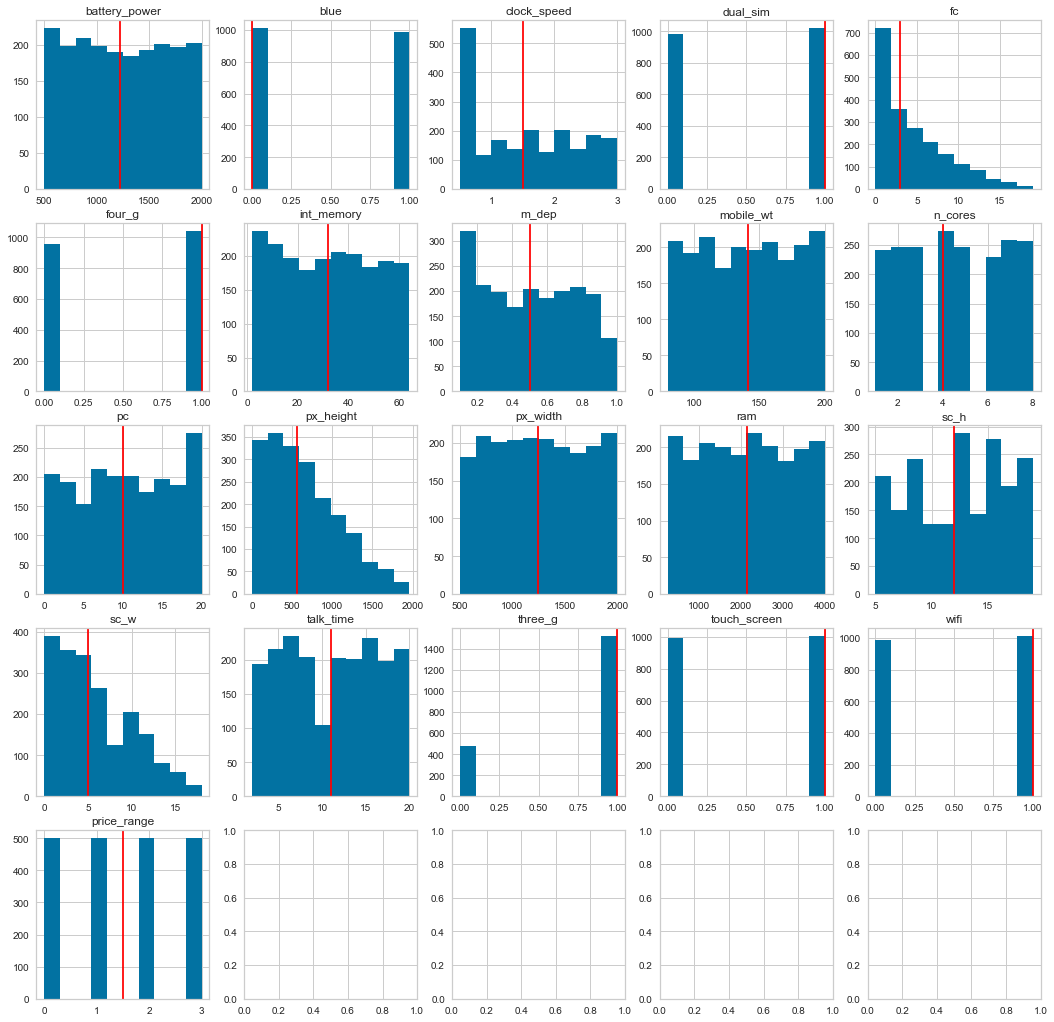

In [6]:
def plot_histograms(df):
    rows = 5
    cols = 5
    fig, axs = plt.subplots(rows,cols,figsize=(18,18))
    for i,nf in enumerate(df.columns):
        axs[i//cols, i%cols].hist(df[nf])
        axs[i//cols, i%cols].set_title(nf)
        axs[i//cols, i%cols].axvline(df[nf].quantile(0.5), color='red')
plot_histograms(celltrain)

### Feature engineering: criação das features polegadas e densidade de pixels (ppi) 
polegadas e densidade de pixels(pixels por polegada)
    
OBS:observa-se a seguir que há uma porcentagem de 50% de smartphones com baixa densidade de pixels (<300ppi). Observe que há telefones com mais de 643 ppi, a maior densidade de pixels para um telefone no ano de 2022 (Sony Xperia 1 IV). Podem ser encarados como dados suspeitos.

Text(0, 0.5, 'Frequência')

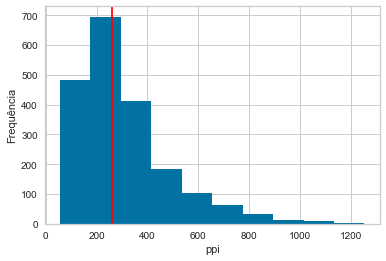

In [7]:
#criação da feature polegadas
celltrain['pol'] = ((celltrain['sc_w'] ** 2 + celltrain['sc_h'] ** 2) ** 0.5) / 2.54

#criação da feature pixels por polegada
celltrain['ppi'] = ((celltrain['px_width'] ** 2 + celltrain['px_height'] ** 2) ** 0.5) / celltrain['pol']
celltrain.head(5)

plt.hist(celltrain['ppi']);
plt.axvline(celltrain['ppi'].quantile(0.5), color='red')
plt.xlabel('ppi')
plt.ylabel('Frequência')

Observe que os valores de ppi maiores do que 681 são exibidos como outliers, um valor bastante próximo ao que cogitamos anteriormente.

Max:681.723560295571
75p:380.8163334683285
25p:179.82817765779515
Min:56.416355049437755



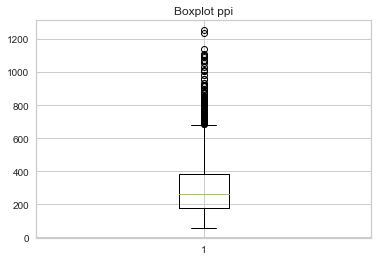

In [8]:
bp = plt.boxplot(celltrain['ppi']);
plt.title('Boxplot ppi')
bp_values = [item.get_ydata() for item in bp['whiskers']]
print(f'Max:{bp_values[1][1]}\n75p:{bp_values[1][0]}\n25p:{bp_values[0][0]}\nMin:{bp_values[0][1]}\n')

### Análise Exploratória de Dados
Relação entre capacidade da bateria (battery power) e tempo de fala (talk time). Apresenta uma correlação média.

Correlação:0.40310101902598583


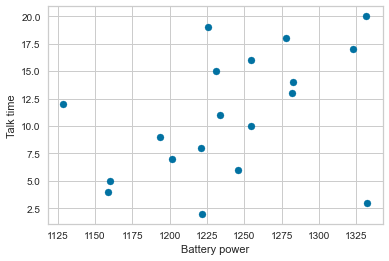

In [9]:
grp = celltrain.groupby(by=['talk_time'])['battery_power'].mean()
x = pd.Series(grp.index) #talk time
y = pd.Series(grp.values) #battery power
plt.scatter(y,x) #battery power x talk time
plt.xlabel('Battery power')
plt.ylabel('Talk time')
print(f'Correlação:{x.corr(y)}')

Relação entre preço e memória RAM. Apresenta uma elevada correlação. Praticamente a memória RAM determina o preço do smartphone.

Correlação:0.999962246660744


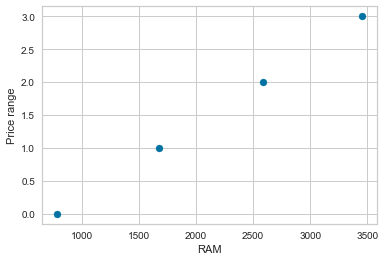

In [10]:
grp = celltrain.groupby(by=['price_range'])['ram'].mean()
x = pd.Series(grp.index)
y = pd.Series(grp.values)
plt.scatter(y,x)
plt.xlabel('RAM')
plt.ylabel('Price range')
print(f'Correlação:{x.corr(y)}')

Observe a seguir que há telefones que possuem mais polegadas do que o maior celular já fabricado (Samsung Galaxy Z Fold 4 de 7.6 polegadas). Podem ser considerados como dados suspeitos.

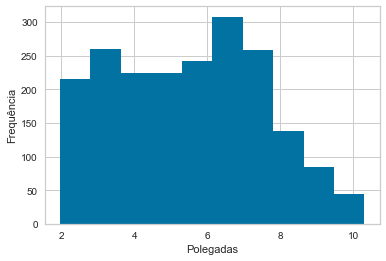

In [11]:
plt.hist(celltrain['pol'])
plt.xlabel('Polegadas');
plt.ylabel('Frequência');

Max:10.304135691576693
75p:7.042733787400913
25p:3.7349736143721017
Min:1.968503937007874



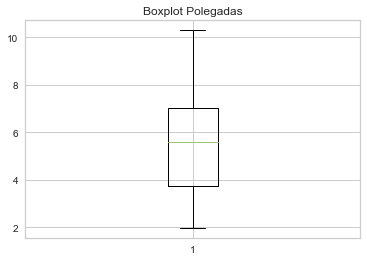

In [12]:
bp = plt.boxplot(celltrain['pol']);
plt.title('Boxplot Polegadas')
bp_values = [item.get_ydata() for item in bp['whiskers']]
print(f'Max:{bp_values[1][1]}\n75p:{bp_values[1][0]}\n25p:{bp_values[0][0]}\nMin:{bp_values[0][1]}\n')

A seguir, verifica-se a quantidade de outliers para cada feature. A feature 'three_g' há de ser desconsiderada por se tratar de valores binários (presença ou ausência de bluetooth), não fazendo sentido falar-se em outliers.

In [13]:
#quantidade de outliers por cada feature
def outliers(df, columns):
    for col in columns:
        q3 = np.percentile(df[col],75)
        q2 = np.median(df[col])
        q1 = np.percentile(df[col],25)
        mean = np.mean(df[col])
        iiq = q3-q1
        LS = q3 + 1.5 * iiq
        LI = q1 - 1.5 * iiq
        
        #quantidade de outliers
        nr_outliers = df.loc[(df[col] < LI) | (df[col] > LS)].shape[0]
        
        print(f'{col:<35}: {nr_outliers}')

outliers(celltrain,celltrain.columns)

battery_power                      : 0
blue                               : 0
clock_speed                        : 0
dual_sim                           : 0
fc                                 : 18
four_g                             : 0
int_memory                         : 0
m_dep                              : 0
mobile_wt                          : 0
n_cores                            : 0
pc                                 : 0
px_height                          : 2
px_width                           : 0
ram                                : 0
sc_h                               : 0
sc_w                               : 0
talk_time                          : 0
three_g                            : 477
touch_screen                       : 0
wifi                               : 0
price_range                        : 0
pol                                : 0
ppi                                : 102


### Pré-processamento: outliers
Pré processamento: realização de drop nos outliers, por se tratar de poucos casos frente à quantidade total de aparelhos analisados.

In [14]:
def drop_outliers(df):
    cols2drop = ['fc', 'px_height', 'ppi']
    indexes2drop = []
    for col in cols2drop:
        q3 = np.percentile(df[col],75)
        q2 = np.median(df[col])
        q1 = np.percentile(df[col],25)
        mean = np.mean(df[col])
        iiq = q3-q1
        LS = q3 + 1.5 * iiq
        LI = q1 - 1.5 * iiq
        
        indexes2drop.extend(list(df.loc[(df[col] < LI) | (df[col] > LS)].index))
        
    df_after_drop = celltrain.drop(indexes2drop, axis=0)
    return df_after_drop

celltrain_mod = drop_outliers(celltrain)
celltrain_mod

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pol,ppi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,4.488880,168.475113
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,6.796329,321.394163
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,4.401709,484.058963
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,7.042734,306.792809
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,3.246540,527.084472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,5.354910,420.294822
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,5.852783,370.352162
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,3.565112,518.489087
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,8.106795,92.457066


### Pré-processamento: dados inconsistentes
    Removendo entradas inconsistentes que possuem celulares com dimensões nulas para a tela (sc_w = 0 ou sc_h = 0)
    Removendo entradas inconsistentes que possuem celulares com dimensões nulas para resolução de pixels em altura ou largura(px_height = 0 ou px_width = 0)
<!--     Removendo entradas inconsistentes que possuem celulares com espessura menor do que o celular mais fino já fabricado (4.75mm) -->
<!--     Removendo entradas inconsistentes que possuem celulares com resoluções em pixels menores que o menor valor já fabricado -->

In [15]:
celltrain_mod.drop(celltrain_mod[(celltrain_mod['sc_w'] == 0) | (celltrain_mod['sc_h'] == 0)].index, inplace = True)
celltrain_mod.drop(celltrain_mod[(celltrain_mod['px_height'] == 0) | (celltrain_mod['px_width'] == 0)].index, inplace = True)
# celltrain_mod.drop(celltrain_mod[celltrain_mod['m_dep'] < 0.475].index, inplace = True)
# celltrain_mod.drop(celltrain_mod[(celltrain_mod['px_height'] < 360) | (celltrain_mod['px_width'] < 320)].index, inplace = True)
celltrain_mod
# celltrain_mod

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pol,ppi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,4.488880,168.475113
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,6.796329,321.394163
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,4.401709,484.058963
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,7.042734,306.792809
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,3.246540,527.084472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,5.354910,420.294822
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,5.852783,370.352162
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,3.565112,518.489087
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,8.106795,92.457066


### Pré-processamento: normalização
Pré processamento dos dados: as features a seguir serão normalizadas, visto que a maioria apresenta ordem de grandeza destoante das demais. Além do mais, escolheu-se a normalização porque não se pôde constatar que as distribuições apresentam algum comportamento gaussiano, conforme pudemos analisar em gráficos anteriores.

In [16]:
cols_2_normalize = ['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'ppi']
for col in cols_2_normalize:
    celltrain_mod[col] = (celltrain_mod[col]-celltrain_mod[col].min())/(celltrain_mod[col].max()-celltrain_mod[col].min())
celltrain_mod

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pol,ppi
0,0.227789,0,2.2,0,0.0625,0,0.080645,0.6,0.900000,0.142857,0.10,0.010000,0.171009,0.613102,0.285714,0.352941,0.944444,0,0,1,1,4.488880,0.179206
1,0.347361,1,0.5,1,0.0000,1,0.822581,0.7,0.466667,0.285714,0.30,0.475789,0.993988,0.635027,0.857143,0.117647,0.277778,1,1,0,2,6.796329,0.423756
2,0.041416,1,0.5,1,0.1250,1,0.629032,0.9,0.541667,0.571429,0.30,0.664211,0.812291,0.627540,0.428571,0.058824,0.388889,1,1,0,2,4.401709,0.683892
3,0.076152,1,2.5,0,0.0000,0,0.129032,0.8,0.425000,0.714286,0.45,0.639474,0.859051,0.671925,0.785714,0.411765,0.500000,1,0,0,2,7.042734,0.400406
4,0.881764,1,1.2,0,0.8125,1,0.677419,0.6,0.508333,0.142857,0.70,0.635263,0.475618,0.308824,0.214286,0.058824,0.722222,1,1,0,1,3.246540,0.752699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1,0.5,1,0.0000,1,0.000000,0.8,0.216667,0.714286,0.70,0.642632,0.928524,0.110160,0.571429,0.176471,0.944444,1,1,0,0,5.354910,0.581920
1996,0.977956,1,2.6,1,0.0000,0,0.596774,0.2,0.891667,0.428571,0.15,0.481053,0.978624,0.474866,0.428571,0.529412,0.777778,1,1,1,2,5.852783,0.502051
1997,0.941884,0,0.9,1,0.0625,1,0.548387,0.7,0.233333,1.000000,0.15,0.456316,0.756179,0.748930,0.285714,0.000000,0.166667,1,1,0,3,3.565112,0.738953
1998,0.675351,0,0.9,0,0.2500,1,0.709677,0.1,0.541667,0.571429,0.25,0.176316,0.113560,0.163904,0.928571,0.529412,0.944444,1,1,1,0,8.106795,0.057637


### Feature engineering: square root transform
Feature engineering: features positivamente enviesadas (fc, ph_height e sc_w) aproximadas à curva normal por meio de aplicação de transformação raiz quadrada.

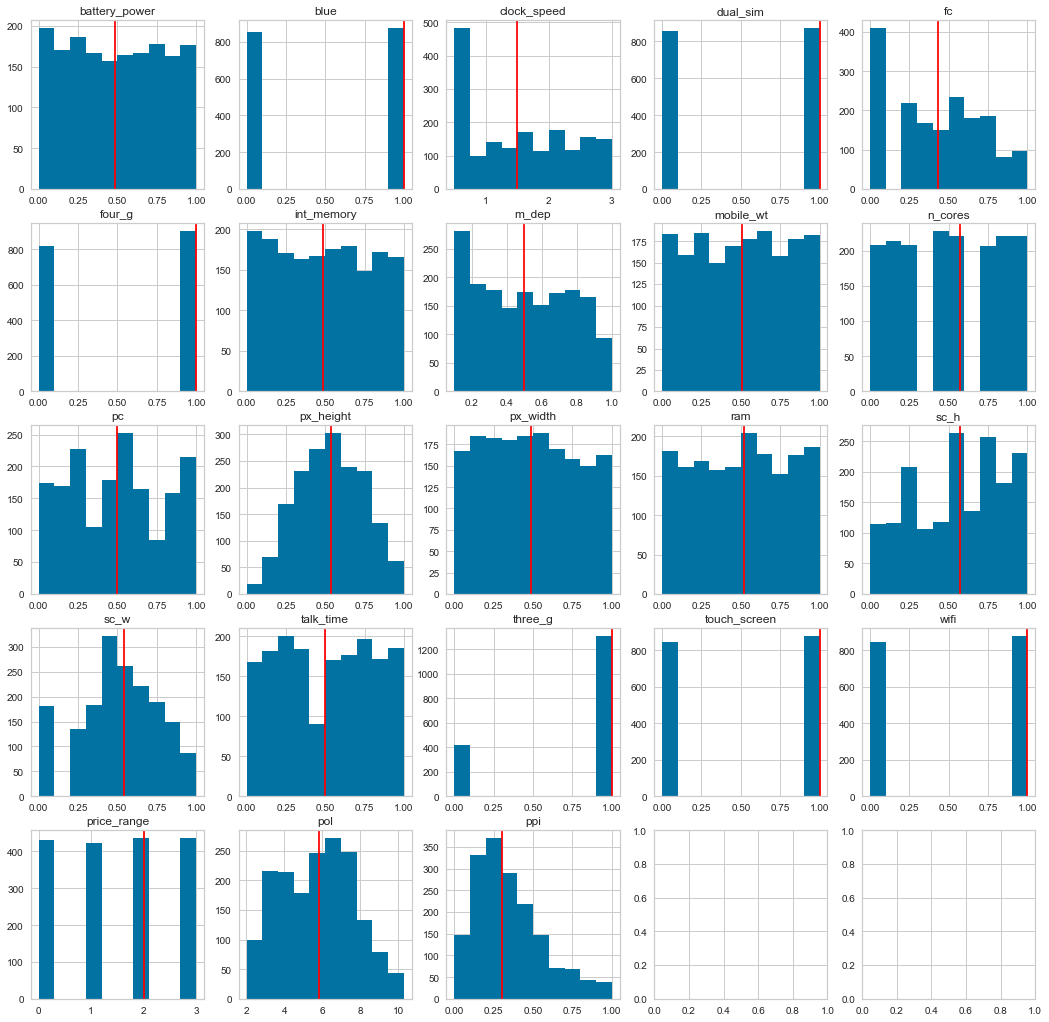

In [17]:
celltrain_mod['fc'] = np.sqrt(celltrain_mod['fc'])
celltrain_mod['px_height'] = np.sqrt(celltrain_mod['px_height'])
celltrain_mod['sc_w'] = np.sqrt(celltrain_mod['sc_w'])
plot_histograms(celltrain_mod)

### Análise Exploratória de Dados (EDA)
Observa-se a seguir que dispositivos de baixo custo se concentram em baixa capacidade de bateria e baixa memória RAM. Já os dispositivos de muito alto custo se concentram em alta capacidade de bateria e alta memória RAM.

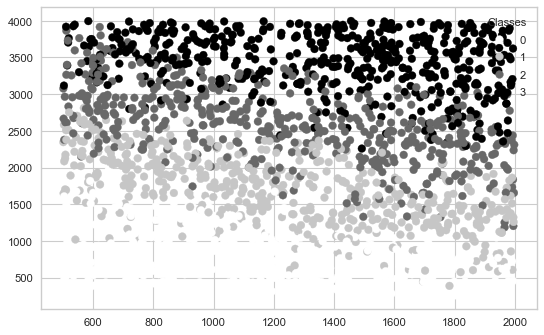

In [18]:
plt.figure(figsize=(8, 5), dpi=80)
scatter = plt.scatter(celltrain['battery_power'],celltrain['ram'], c = celltrain['price_range'], label = celltrain['price_range'])
legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")


In [19]:
celltrain.corr()[celltrain.corr() > 0.2]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pol,ppi
battery_power,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200723,NaN,NaN
blue,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clock_speed,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dual_sim,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fc,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.644595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
four_g,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.584246,NaN,NaN,NaN,NaN,NaN
int_memory,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m_dep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mobile_wt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_cores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Aplicação de modelos não supervisionados

In [20]:
celltrain.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'pol', 'ppi'],
      dtype='object')

Elbow Method:
    
Exploração dos valores de k que melhor traduzem os clusters. Observe que para k = 3 temos um suposto valor ótimo, visto que para valores maiores de k aumentaremos bastante o custo computacional para uma muito baixa redução do erro quadrático (custo).

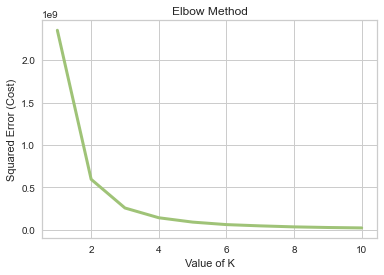

In [21]:
def elbow_method(X,title):
    cost =[]
    for i in range(1, 11):
        KM = KMeans(n_clusters = i, max_iter = 500)
        KM.fit(X)

        # calculates squared error
        # for the clustered points
        cost.append(KM.inertia_)    

    # plot the cost against K values
    plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
    plt.title(title)
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
elbow_method(celltrain[['ram','price_range']], 'Elbow Method')

KMeans
    
Observe que dispositivos com memória RAM entre 256 e 1500 predominam para valores de baixo e médio custo. Dispositivos com memória RAM entre 1500 e 2700 predominam entre médio e alto custo. Já os dispositivos que possuem memória RAM acima de 2700 predominam entre alto e muito alto custo.

Text(0, 0.5, 'price_range')

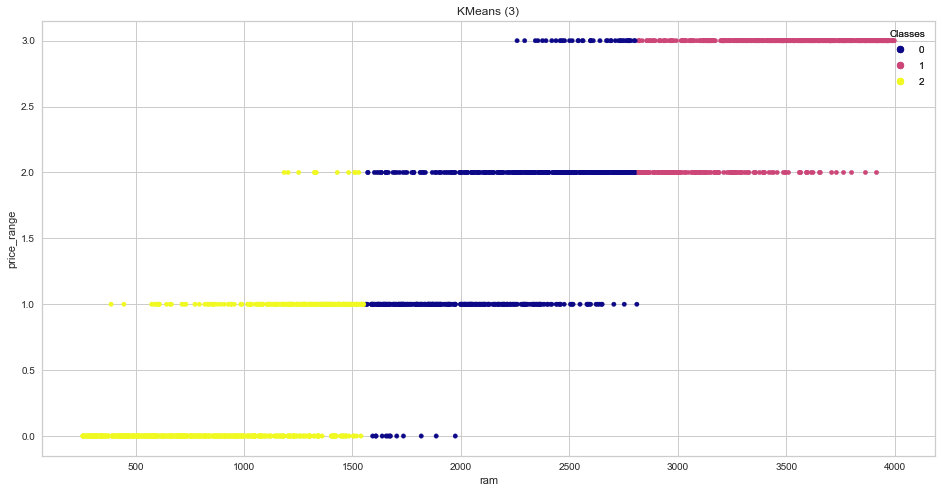

In [31]:
#application of kmeans
xcol = 'ram'
ycol = 'price_range'
k = 3

X = celltrain[[xcol, ycol]]
kmeans = KMeans(n_clusters = k)
kmeans.fit(X)
predictions = kmeans.predict(X)

fig, axs = plt.subplots(1,1,figsize = (16,8))
scatter = axs.scatter(celltrain[xcol], celltrain[ycol], c=predictions, s=20, cmap='plasma')
axs.set_title(f'KMeans ({k})')
legend1 = axs.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
axs.add_artist(legend1)
axs.set_xlabel(xcol)
axs.set_ylabel(ycol)

Silhouette Analysis:
    
Mede o quão um elemento é similar ao cluster a que pertence (coesão) em relação a outros clusters (separação). O silhouette score varia de [-1,1], sendo que valores mais próximos de 1 indicam que o elemento está muito bem identificado ao próprio cluster a que pertence em relação aos demais clusters. Observe que para todas as plotagens de silhouette, cada cluster (em cada plotagem) apresenta valores maiores do que a média do silhouette score (linha pontilhada vermelha), o que é um bom sinal de que os elementos estão bem acomodados a seus clusters de origem. Os clusters apresentam uma espessura semelhante, indicando que apresentam dimensões semelhantes em quantidade de elementos. Clusters mais pontiagudos refletem piores cenários, pois haverá mais elementos "indecisos" pertencentes àquele cluster, pois maior a probabilidade de estarem abaixo do silhouette score.

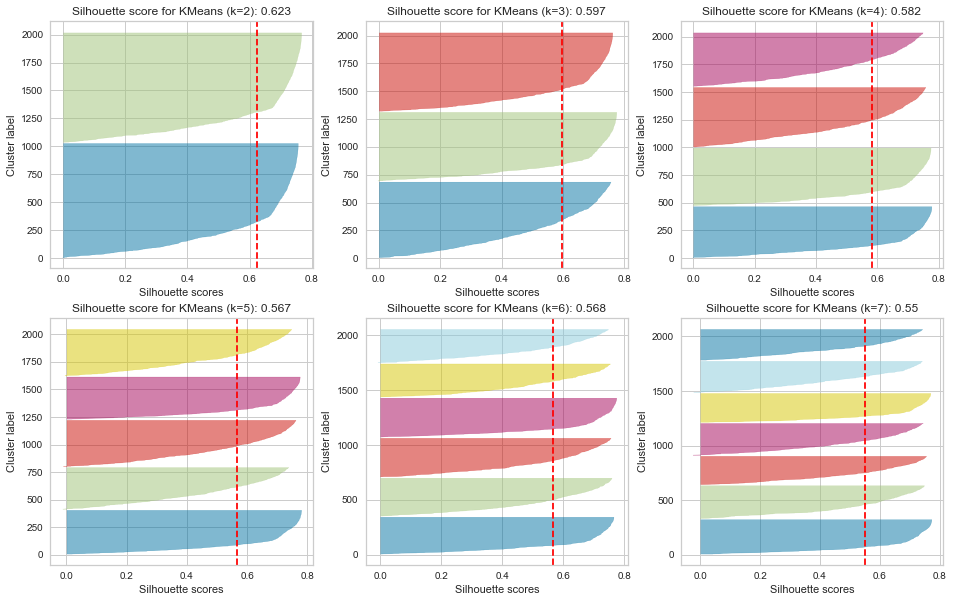

In [23]:
def plot_silhouette(X, kmin, kmax):
    fig, axs = plt.subplots(2,3,figsize=(16,10))
    for i,k in enumerate(range(kmin,kmax)):
        kmeans = KMeans(n_clusters = k)
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax = axs[i//3,i%3], )
        visualizer.fit(X)  
        score = silhouette_score(X, kmeans.labels_, metric='euclidean')
        axs[i//3,i%3].set_title(f'Silhouette score for KMeans (k={k}): {round(score,3)}')
        axs[i//3,i%3].set_xlabel('Silhouette scores')
        axs[i//3,i%3].set_ylabel('Cluster label')
        
plot_silhouette(celltrain[['ram','price_range']], 2, 8)

DBSCAN

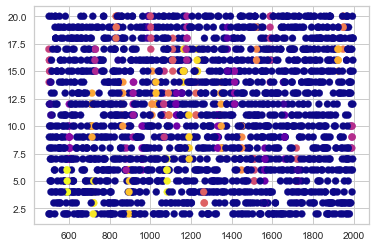

In [32]:
# ff = mdf[mdf['Distancia'] <= 1000]
clusters = DBSCAN(eps=2.5, min_samples=5).fit(celltrain[['battery_power','talk_time']])
plt.scatter(celltrain['battery_power'], celltrain['talk_time'], c = clusters.labels_, cmap='plasma')

### Performance: dados não tratados
A seguir, performance dos modelos nos dados não tratados.

In [25]:
#one hot encoding em colunas categóricas
# categorical_cols = [i for i in categorical_features if i != 'price_range']
# df_dum = pd.get_dummies(data=cellphone_data_train, columns=categorical_cols)

#separação em treino e teste
X = celltrain.drop(['price_range'], axis=1)
y = celltrain['price_range']

modelos = []
modelos.append(('AB', AdaBoostClassifier()))
modelos.append(('SGD', SGDClassifier()))
modelos.append(('RFC', RandomForestClassifier()))
modelos.append(('LR', LogisticRegression(max_iter=1000)))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('GNB', GaussianNB()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('SVM', SVC()))

for modelo in modelos:
    nome = modelo[0]
    modelo_aplicado = modelo[1]
    
    skfold = StratifiedKFold(n_splits=3)
    
    resultados_f1_micro = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='f1_micro')
    resultados_f1_macro = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='f1_macro')
    resultados_mse = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='neg_mean_squared_error')
    resultados_abs = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='neg_mean_absolute_error')

    nrformat = 20
    print(f'F1-Score micro de {nome}: {resultados_f1_micro.mean()}')
    print(f'F1-Score macro de {nome}: {resultados_f1_macro.mean()}')
    print(f'MSE de {nome}: {resultados_mse.mean()}')
    print(f'ABS de {nome}: {resultados_abs.mean()}\n')

F1-Score micro de AB: 0.6699960830395613
F1-Score macro de AB: 0.6625113818739198
MSE de AB: -0.3300039169604387
ABS de AB: -0.3300039169604387

F1-Score micro de SGD: 0.5354725039882461
F1-Score macro de SGD: 0.37986846229856414
MSE de SGD: -0.694077135606371
ABS de SGD: -0.6260848554701628

F1-Score micro de RFC: 0.870990180585383
F1-Score macro de RFC: 0.8727217998619458
MSE de RFC: -0.13151082116599358
ABS de RFC: -0.13450481966224095



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

F1-Score micro de LR: 0.7380041210625917
F1-Score macro de LR: 0.7379843386015446
MSE de LR: -0.27399888644266457
ABS de LR: -0.2659968814391603

F1-Score micro de KNN: 0.9190007098552826
F1-Score macro de KNN: 0.9190425638054727
MSE de KNN: -0.08099929014471742
ABS de KNN: -0.08099929014471742

F1-Score micro de DTC: 0.8195016605811208
F1-Score macro de DTC: 0.821446836385563
MSE de DTC: -0.18150159154656906
ABS de DTC: -0.1860000930465698

F1-Score micro de GNB: 0.8014896455676066
F1-Score macro de GNB: 0.8023424494815293
MSE de GNB: -0.2015111063087075
ABS de GNB: -0.19951060505783144

F1-Score micro de LDA: 0.9429999714857286
F1-Score macro de LDA: 0.943404773662797
MSE de LDA: -0.05700002851427139
ABS de LDA: -0.05700002851427139

F1-Score micro de SVM: 0.9474984729857293
F1-Score macro de SVM: 0.9471941378983181
MSE de SVM: -0.05250152701427064
ABS de SVM: -0.05250152701427064



### Performance: dados tratados
A seguir, perfomance dos modelos nos dados tratados.

In [26]:
X = celltrain_mod.drop(['price_range'], axis=1)
y = celltrain_mod['price_range']

modelos = []
modelos.append(('AB', AdaBoostClassifier()))
modelos.append(('SGD', SGDClassifier()))
modelos.append(('RFC', RandomForestClassifier()))
modelos.append(('LR', LogisticRegression(max_iter=1000)))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('GNB', GaussianNB()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('SVM', SVC()))

for modelo in modelos:
    nome = modelo[0]
    modelo_aplicado = modelo[1]
    
    skfold = StratifiedKFold(n_splits=3)

    resultados_f1_micro = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='f1_micro')
    resultados_f1_macro = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='f1_macro')
    resultados_mse = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='neg_mean_squared_error')
    resultados_abs = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='neg_mean_absolute_error')

    nrformat = 20
    print(f'F1-Score micro de {nome}: {resultados_f1_micro.mean()}')
    print(f'F1-Score macro de {nome}: {resultados_f1_macro.mean()}')
    print(f'MSE de {nome}: {resultados_mse.mean()}')
    print(f'ABS de {nome}: {resultados_abs.mean()}\n')

F1-Score micro de AB: 0.6287832125603865
F1-Score macro de AB: 0.5996916103463942
MSE de AB: -0.37642814009661835
ABS de AB: -0.3729539049919484

F1-Score micro de SGD: 0.7104398148148148
F1-Score macro de SGD: 0.7110326744786327
MSE de SGD: -0.26520028180354266
ABS de SGD: -0.26404589371980675

F1-Score micro de RFC: 0.8616002415458937
F1-Score macro de RFC: 0.8671698165044216
MSE de RFC: -0.1372463768115942
ABS de RFC: -0.1343498389694042

F1-Score micro de LR: 0.8882467793880838
F1-Score macro de LR: 0.8869232063632678
MSE de LR: -0.11175322061191627
ABS de LR: -0.11175322061191627

F1-Score micro de KNN: 0.3618770128824476
F1-Score macro de KNN: 0.36160578238445246
MSE de KNN: -1.4129599436392917
ABS de KNN: -0.8720783011272141

F1-Score micro de DTC: 0.8170038244766505
F1-Score macro de DTC: 0.8142716697047744
MSE de DTC: -0.19284219001610306
ABS de DTC: -0.1893659420289855

F1-Score micro de GNB: 0.8042723429951691
F1-Score macro de GNB: 0.804295379647566
MSE de GNB: -0.197466787

### Curva de Aprendizado

In [27]:
# X = celltrain.drop(['price_range'], axis=1)
# y = celltrain['price_range']

# modelos = []
# modelos.append(('AB', AdaBoostClassifier()))
# modelos.append(('SGD', SGDClassifier()))
# modelos.append(('RFC', RandomForestClassifier()))
# modelos.append(('LR', LogisticRegression(max_iter=1000)))
# modelos.append(('KNN', KNeighborsClassifier()))
# modelos.append(('DTC', DecisionTreeClassifier()))
# modelos.append(('GNB', GaussianNB()))
# modelos.append(('LDA', LinearDiscriminantAnalysis()))
# modelos.append(('SVM', SVC()))

# fig, ax = plt.subplots(3, 3, figsize=(20, 15))
# skfold = StratifiedKFold(n_splits=3)
# common_params = {
#     "X": X,
#     "y": y,
#     "train_sizes": np.linspace(0.1, 1.0, 5),
#     "cv": skfold,
#     "score_type": "both",
#     "n_jobs": 4,
#     "line_kw": {"marker": "o"},
#     "std_display_style": "fill_between",
#     "score_name": "Accuracy",
# }

# for ax_idx, model in enumerate(modelos):
#     modelo_aplicado = model[1]
#     LearningCurveDisplay.from_estimator(modelo_aplicado, **common_params, ax=ax[ax_idx//3, ax_idx%3], scoring = 'accuracy')
#     handles, label = ax[ax_idx//3, ax_idx%3].get_legend_handles_labels()
#     ax[ax_idx//3, ax_idx%3].legend(handles[:2], ["Training Score", "Test Score"])
#     ax[ax_idx//3, ax_idx%3].set_title(f"Learning Curve for {model[0]}")    